**We chose the School System Finances data set**

In [295]:
# Removes the need to call plt.show() every time
%matplotlib inline

# Import all necessary libraries
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set() # Make it prettier
import pandas as pd 
import numpy as np
from collections import defaultdict

In [296]:
# Import Data
SchoolFinance = pd.read_csv('elsec15.csv', index_col=False, low_memory=False)

In [297]:
# Overall Shape
SchoolFinance.shape

(14376, 141)

In [298]:
# Statistics
SchoolFinance.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [299]:
# Head
SchoolFinance.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [300]:
# Sum to find total current spending on instruction
InstrElem = SchoolFinance[['E13', 'J13', 'J12', 'J14', 'V91', 'V92']]
InstrSum = InstrElem.sum(axis=1)

# Sum to find total revenue from Federal Government
FedRev = SchoolFinance[['C14', 'C15', 'C16', 'C17', 'C19', 'B11', 'C20', 'C25',
                       'C36', 'B10', 'B12', 'B13']]
FedRevSum = FedRev.sum(axis=1)

# Sum to find total revenue from State Government
StateRev = SchoolFinance[['C01', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 
                          'C11', 'C12', 'C13', 'C24', 'C35', 'C38', 'C39']]
StateRevSum = StateRev.sum(axis=1)

# Sum to find total revenue from Local Govermnent
LocalRev = SchoolFinance[['T02', 'T06', 'T09', 'T15', 'T40', 'T99', 'D11', 'D23', 
                          'A07', 'A08', 'A09', 'A11', 'A13', 'A15', 'A20', 'A40', 
                          'U11', 'U22', 'U30', 'U50', 'U97']]
LocalRevSum = LocalRev.sum(axis=1)

In [301]:
# Picking out data columns that we want to examine
SchoolFinanceShort = SchoolFinance[['STATE', 'NAME', 'TOTALREV', 'TOTALEXP', 'Z32', 'Z34', '_19H']]

# STATE - Location of School
# NAME - Name of school district
# TOTALREV - Total Revenue to school
# TOTALEXP - Total Expenditure of school
# Z32 - TOTALSAL - Total salaries and wages
# Z34 - TOTALBEN - Total employee benefit payments
# _19H - DEBTOUT - Long-term debt outstanding at beginning of the fiscal year

# Append Total Spending on Instruction, Revenue from Federal, Revenue from State, and Revenue from Local
# TOTALINST - Total Spending on Instruction
# FEDREV - Total Revenue from Federal Government
# STATEREV - Total Revenue from State Government
# LOCALREV - Total Revenue from Local Government
SchoolFinanceShort = pd.concat([SchoolFinanceShort, InstrSum], axis=1)
SchoolFinanceShort = pd.concat([SchoolFinanceShort, FedRevSum], axis=1)
SchoolFinanceShort = pd.concat([SchoolFinanceShort, StateRevSum], axis=1)
SchoolFinanceShort = pd.concat([SchoolFinanceShort, LocalRevSum], axis=1)

In [302]:
# Changing column titles appropriately and print head of shortened dataset before cleaning
SchoolFinanceShort.columns = ['STATE', 'NAME', 'TOTALREV', 'TOTALEXP', 'TOTALSAL', 'TOTALBEN', 
                              'DEBTOUT', 'TOTALINST', 'FEDREV', 'STATEREV', 'LOCALREV']
SchoolFinanceShort.head()

,STATE,NAME,TOTALREV,TOTALEXP,TOTALSAL,TOTALBEN,DEBTOUT,TOTALINST,FEDREV,STATEREV,LOCALREV
0,1,AUTAUGA COUNTY SCHOOL DISTRICT,79665,76069,42440,17720,49431,44085,7574,53244,18847
1,1,BALDWIN COUNTY SCHOOL DISTRICT,330317,297083,153812,60668,337160,155692,23602,143282,163433
2,1,BARBOUR COUNTY SCHOOL DISTRICT,10519,10314,5317,2100,8024,5249,2518,5632,2369
3,1,EUFAULA CITY SCHOOL DISTRICT,26076,25602,13627,5667,0,14887,3374,16048,6654
4,1,BIBB COUNTY SCHOOL DISTRICT,31825,31293,16925,7005,22155,16201,3586,21687,6552


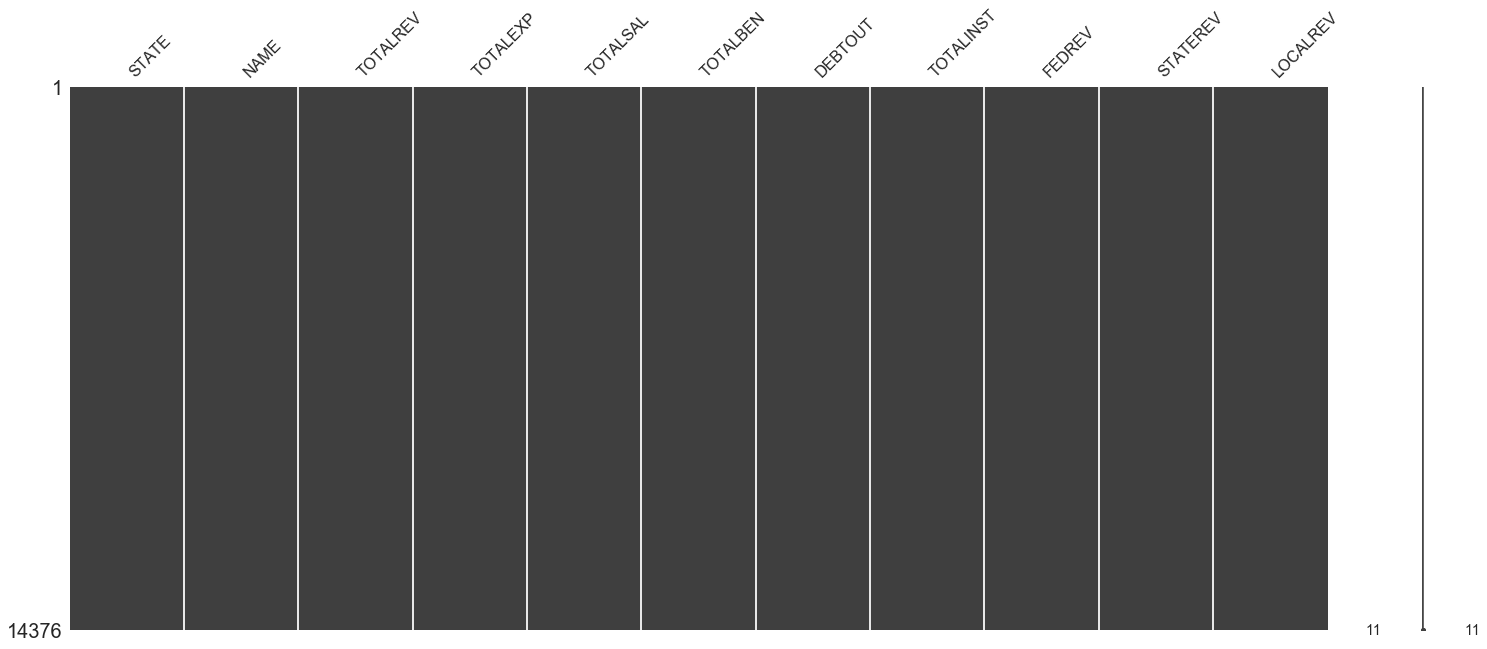

In [303]:
# Check Dataset for Missing data, no missing data!
msno.matrix(SchoolFinanceShort)

In [304]:
# Find out how many entries are empty in data frame and where they are
np.where(pd.isnull(SchoolFinanceShort))

(array([], dtype=int64), array([], dtype=int64))

**There doesn't seem to be any empty or NaN values in the dataset, so it doesn't need further cleaning.**

In [305]:
# Summing up all TOTALREV for schools in each state
totalrev_dict = defaultdict(lambda:0)
for index, row in SchoolFinanceShort.iterrows():
    totalrev_dict[row.STATE] += row.TOTALREV
sorted_by_state = sorted(totalrev_dict.items())
state, total_rev = zip(*sorted_by_state)

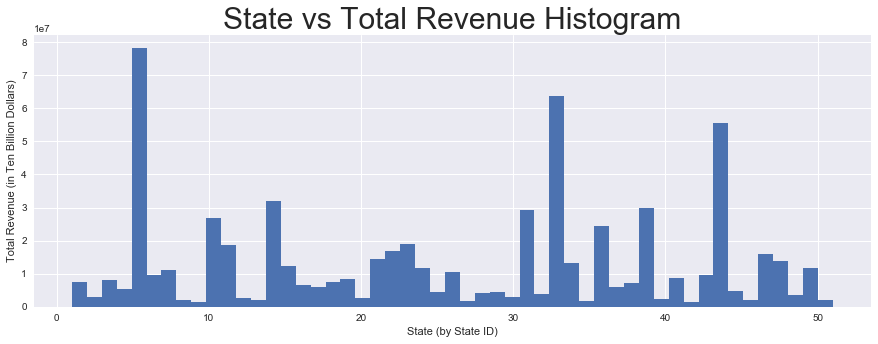

In [306]:
# Histogram of State vs Total Revenue
plt.figure(figsize=(15, 5))
plt.hist(state, weights=total_rev, bins=len(state))
plt.title("State vs Total Revenue Histogram", fontsize=30)
plt.ylabel('Total Revenue (in Ten Billion Dollars)')
plt.xlabel('State (by State ID)')

**We can see that there are three states with much higher total revenue than the rest.**  
**This makes sense since CA, NY, and TX are the three most populated states in the U.S.**

**These states are:**  
1 - California  
2 - New York  
3 - Texas

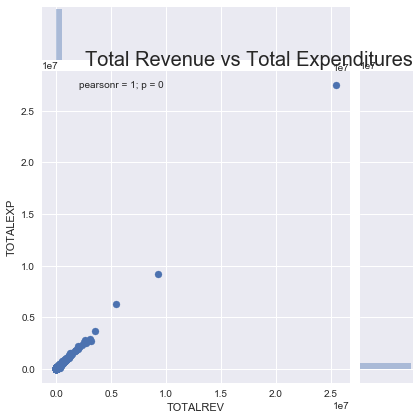

In [307]:
# Total Revenue vs Total Expenditures
sns.jointplot(SchoolFinanceShort.TOTALREV, SchoolFinanceShort.TOTALEXP)
plt.title('Total Revenue vs Total Expenditures', fontsize = 20, loc = 'right')

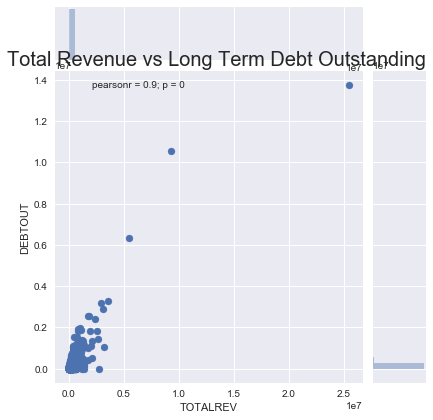

In [277]:
# Total Revenue vs Long Term Debt Outstanding
sns.jointplot(SchoolFinanceShort.TOTALREV, SchoolFinanceShort.DEBTOUT)
plt.title('Total Revenue vs Long Term Debt Outstanding', fontsize = 20, loc = 'right')

**We can see in both of these plots that there are several outliers that don't represent the whole data set.  **

**Let's zoom in on the graph to get a better representation of the entire data set.**

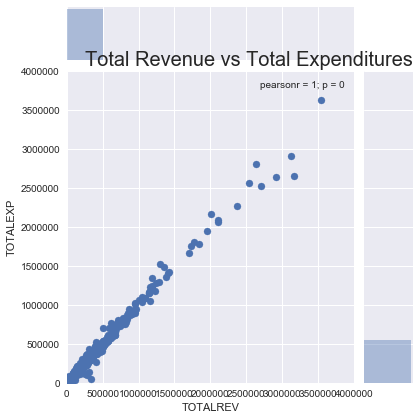

In [288]:
# Total Revenue vs Total Expenditures; Zoomed to remove outliers
sns.jointplot(SchoolFinanceShort.TOTALREV, SchoolFinanceShort.TOTALEXP, xlim=(0,0.4e7), ylim=(0, 0.4e7))
plt.title('Total Revenue vs Total Expenditures', fontsize = 20, loc = 'right')

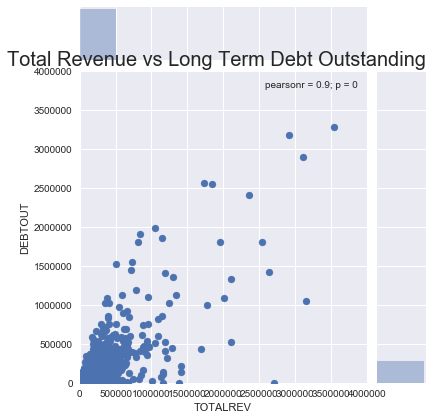

In [289]:
# Total Revenue vs Long Term Debt Outstanding; Zoomed in to remove outliers
sns.jointplot(SchoolFinanceShort.TOTALREV, SchoolFinanceShort.DEBTOUT, xlim=(0, 0.4e7), ylim=(0, 0.4e7))
plt.title('Total Revenue vs Long Term Debt Outstanding', fontsize = 20, loc = 'Right')

**We can see in these two plots that the data between Total Revenue vs Total Expenditures is fairly linear. We can also see in this graph that the number of schools who choose to spend less than they get in revenue is more than the number of schools who choose to spend most of their revenue.  **

**Total Revenue vs Long Term Debt Outstanding is somewhat linear, but is a lot more scattered than Total Revenue vs Total Expenditures. It also looks like slightly more schools tend to have more long term debt outstandng than total revenue, with the numbers generally increasing together. This may be because with more revenue, schools feel more free and safe to spend money improving the school and acruing debt.  **

**Let's look at some other relationships between our data.**

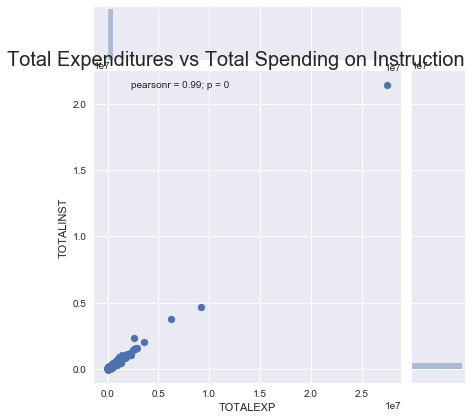

In [290]:
# Total Expenditures vs Total Spending on Instruction
sns.jointplot(SchoolFinanceShort.TOTALEXP, SchoolFinanceShort.TOTALINST)
plt.title('Total Expenditures vs Total Spending on Instruction', fontsize = 20, loc = 'right')

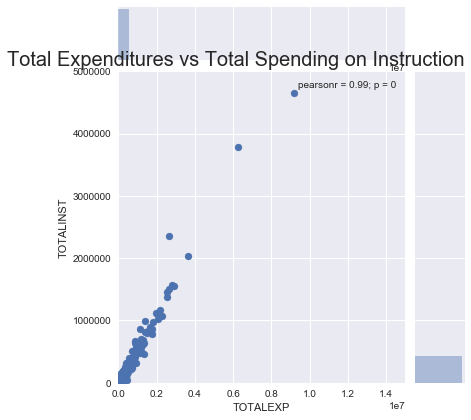

In [291]:
# There are some outliers, so let's zoom in on the cluster of points near the origin. Regression includes outliers.
sns.jointplot(SchoolFinanceShort.TOTALEXP, SchoolFinanceShort.TOTALINST, xlim=(0, 1.5e7), ylim=(0, 0.5e7))
plt.title('Total Expenditures vs Total Spending on Instruction', fontsize = 20, loc = 'right')

**Looks like most schools' spending on instruction makes up a good proportion of their total expenditures.**

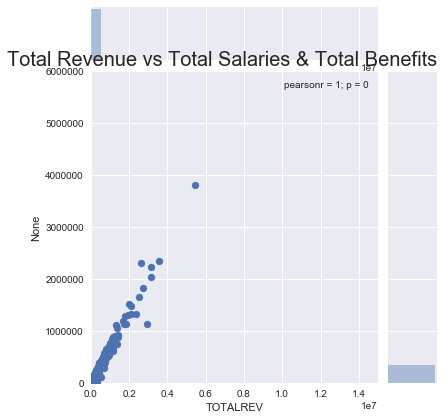

In [293]:
# Total Revenue vs Total Salaries & Total Benefits
sns.jointplot(SchoolFinanceShort.TOTALREV, SchoolFinanceShort.TOTALSAL + SchoolFinanceShort.TOTALBEN, xlim=(0, 1.5e7), ylim=(0, 0.6e7))
plt.title('Total Revenue vs Total Salaries & Total Benefits', fontsize = 20, loc = 'right')

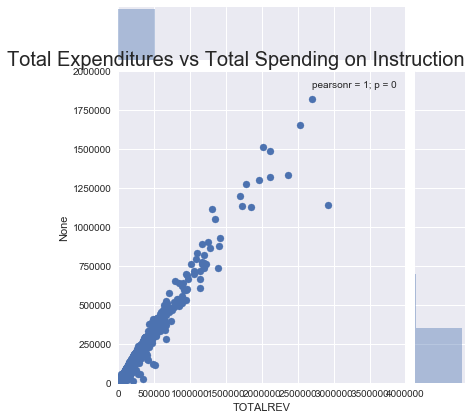

In [294]:
# Let's zoom in on the cluster of points to get a better picture.
sns.jointplot(SchoolFinanceShort.TOTALREV, SchoolFinanceShort.TOTALSAL + SchoolFinanceShort.TOTALBEN, xlim=(0, 0.4e7), ylim=(0, 0.2e7))
plt.title('Total Expenditures vs Total Spending on Instruction', fontsize = 20, loc = 'right')

**Looks like roughly two-thirds of total revenue goes to total salaries and total benefits, which is to be expected.  
Costs to pay teachers is high, even though most teachers don't earn enough! :(**

In [247]:
# Let's check on how schools are budgeting their finances in California (State No. 05)
CaliSchoolFinance = SchoolFinanceShort[SchoolFinanceShort.STATE == 5]
CaliSchoolFinance.head()

,STATE,NAME,TOTALREV,TOTALEXP,TOTALSAL,TOTALBEN,DEBTOUT,TOTALINST,FEDREV,STATEREV,LOCALREV
675,5,ALAMEDA CO OFFICE OF ED,48528,39288,24654,6004,0,7951,5283,14775,28470
676,5,ALPINE COUNTY SPECIAL SCHOOLS,1306,1281,376,81,0,354,269,859,178
677,5,AMADOR CO SPL SCHS OPER BY CO SUPT,10718,11285,6804,2131,0,6386,1172,4740,4806
678,5,BUTTE CO SPL SCHS OPER BY CO SUPT,72580,70034,31907,11447,0,18038,27259,23047,22274
679,5,CALAVERAS CO SPL SCHS OPER BY CO SUPT,14026,14963,7016,2361,0,6085,1655,10118,2253


In [248]:
# Let's get the average values for all California Schools
CaliDescribe = CaliSchoolFinance.describe()
CaliDescribe

,STATE,TOTALREV,TOTALEXP,TOTALSAL,TOTALBEN,DEBTOUT,TOTALINST,FEDREV,STATEREV,LOCALREV
count,1057.0,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03
mean,5.0,7.402842e+04,7.413998e+04,3.653781e+04,1.285080e+04,5.371057e+04,3.685712e+04,7.148879e+03,4.007613e+04,2.680341e+04
std,0.0,3.072343e+05,3.054752e+05,1.448052e+05,6.040206e+04,3.450499e+05,1.539359e+05,3.795962e+04,1.893682e+05,8.768298e+04
min,5.0,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.0,4.098000e+03,3.984000e+03,1.877000e+03,6.270000e+02,0.000000e+00,1.958000e+03,2.600000e+02,1.624000e+03,1.391000e+03
50%,5.0,2.011700e+04,1.989600e+04,1.013600e+04,3.305000e+03,4.321000e+03,9.657000e+03,1.299000e+03,8.596000e+03,6.978000e+03
75%,5.0,7.026000e+04,7.003400e+04,3.470100e+04,1.154400e+04,3.861100e+04,3.585800e+04,5.515000e+03,3.511500e+04,2.689700e+04
max,5.0,9.254891e+06,9.167075e+06,4.326247e+06,1.835740e+06,1.054514e+07,4.646318e+06,1.149733e+06,5.778322e+06,2.326836e+06


**Let's compare where schools spend their money on average in California.  **

**We're predicting that a lot of the expenditures will likely be spent on salaries and wages for teachers.**


<Container object of 4 artists>

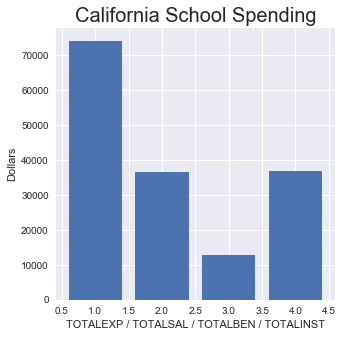

In [260]:
# We grouped together means for TOTALEXP, TOTALSAL, TOTALBEN, and TOTALINST to see how they match up together
Labels = [1, 2, 3, 4] #Arbitrary
Means = [7.413998e+04, 3.653781e+04, 1.285080e+04, 3.685712e+04] #Values obtained from description above

plt.figure(figsize=(5, 5))
plt.ylabel('Dollars')
plt.xlabel('TOTALEXP / TOTALSAL / TOTALBEN / TOTALINST')
plt.title("Average Annual California School Spending", fontsize=20)
plt.bar(Labels, Means)

**As predicted, schools are spending a lot of their money on paying teachers their salaries and wages, but they're also spending an approximately equal amount of money on instructional costs.  **

**However, this isn't including total benefits received by the staff members, which raises the amount of money being spent on salaries & benefits combined for staff.**

** Let's also compare the total revenue received from Federal, State, and Local sources in California.  **

**We expect most of the revenue to come from the State Level and Local Level, since at the Federal Level  
there are so many more schools to consider when allocating educational resources**

<Container object of 4 artists>

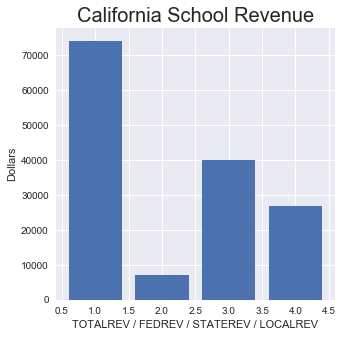

In [261]:
RevLabels = [1, 2, 3, 4]
RevMeans = [7.402842e+04, 7.148879e+03, 4.007613e+04, 2.680341e+04] #Values obtained from description above

plt.figure(figsize=(5, 5))
plt.ylabel('Dollars')
plt.xlabel('TOTALREV / FEDREV / STATEREV / LOCALREV')
plt.title("Average Annual California School Revenue", fontsize=20)
plt.bar(RevLabels, RevMeans)

** It seems like schools in California do receive a lot more revenue at the state and local levels than at the federal level.**


**For our main regression plot, 